# Weather prediction in Australia
**Problem Statement:** 
* **By using the weather data of Australia for the past 10 years, We have to predict the Weather condition (telling that whether rain will come or not) day to day**

# Data description:
* Date - Date of observation.
* Location - Location of the weather station.
* MinTemp - Minimum temperature of that particular location.(degree/celcius)
* MaxTemp - Maximum temperature of that particular location.(degree/celcius)
* Rainfall - Rainfall per millimeter.
* Evaporation - pan Evaporation per millimeter.
* Sunshine - Brightness of sun per hour.
* WindGustDir - Direction of wind.
* WindGustSpeed - Speed of strongest wind.
* WindDir9am - Direction of wind at 9am.
* WindDir3pm - Direction of wind at 3pm.
* WindSpeed9am - Wind speed in KMPH at 9am.
* WindSpeed3pm - Wind speed in KMPH at 3pm.
* Humidity9am - Air moisture at 9am.
* Humidity3pm - Air moisture at 3pm.
* Pressure9am - Pressure in sea level at 9am.
* Pressure3pm - Pressure in sea level at 3pm.
* Cloud9am - Fraction of sky obscured by cloud at 9am.
* Cloud3pm - Fraction of sky obscured by cloud at 3pm.
* Temp9am - Temperature at 9am (degree/celcius).
* Temp3pm - Temperature at 3pm (degree/celcius).
* RainToday - Did the current day received rain or not (yes or no).
* RainTomorrow ***(Target)*** - whether tomorrow it will rain or not (yes or no).

# Importing dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.shape

(145460, 23)

# Basic information about dataset:

In [8]:
cat = df.select_dtypes(include=np.object)
print("Number of categorical variables:",cat.shape[1])

num = df.select_dtypes(include=(np.int64,np.float64))
print("Number of Numerical variables:",num.shape[1])

Number of categorical variables: 7
Number of Numerical variables: 16


In [9]:
print(cat.columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [10]:
print(num.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [13]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [15]:
df[['Year','Month','Day']] = df['Date'].str.split("-",expand=True)

In [16]:
df = df.drop(['Date','Month','Day'],axis=1)

In [17]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008


# Univariate analysis

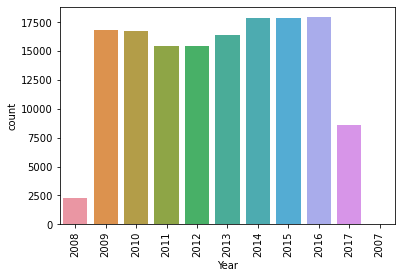

In [18]:
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

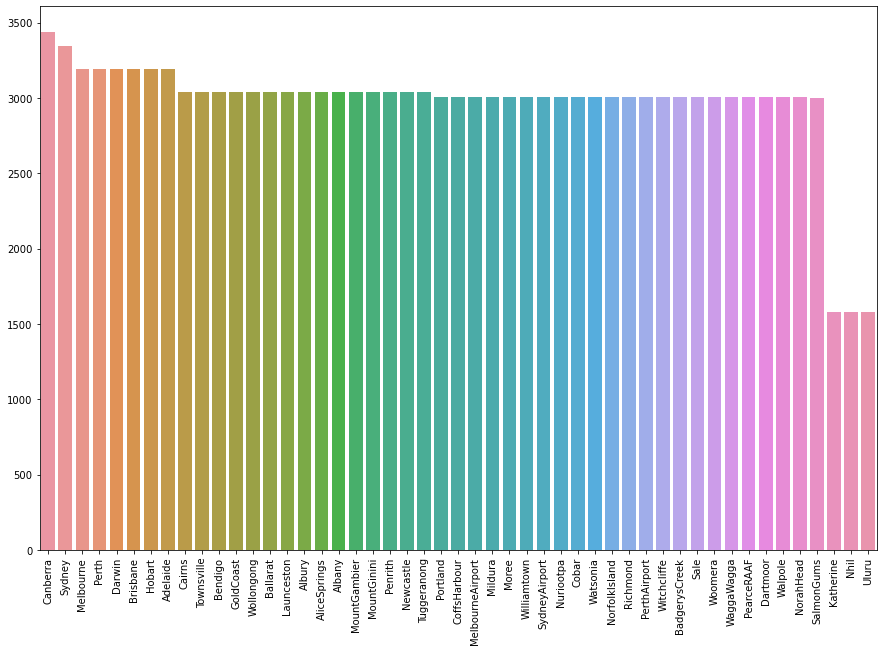

In [19]:
loc = df['Location'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(loc.index,loc.values)
plt.xticks(rotation=90)
plt.show()

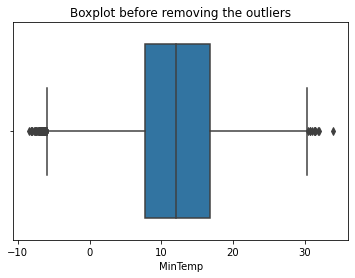

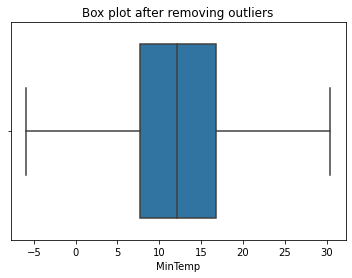

In [20]:
sns.boxplot(df['MinTemp'])
plt.title('Boxplot before removing the outliers')
plt.show()

def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

replace_outliers(df, 'MinTemp')
sns.boxplot(df['MinTemp'])
plt.title('Box plot after removing outliers')
plt.show()

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

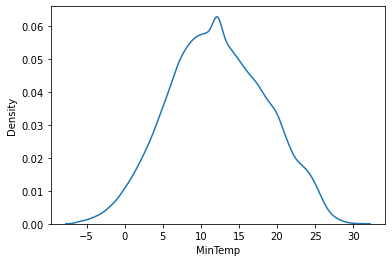

In [21]:
sns.distplot(df['MinTemp'],hist=False)

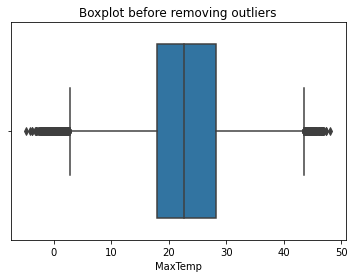

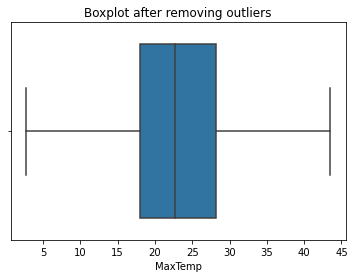

In [22]:
sns.boxplot(df['MaxTemp'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'MaxTemp')
sns.boxplot(df['MaxTemp'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

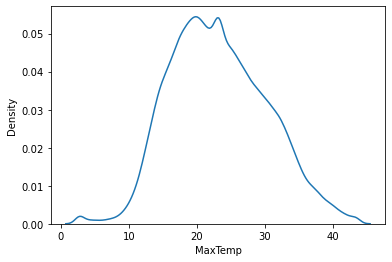

In [23]:
sns.distplot(df['MaxTemp'],hist=False)

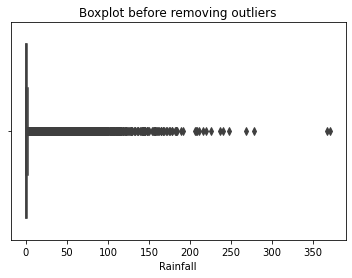

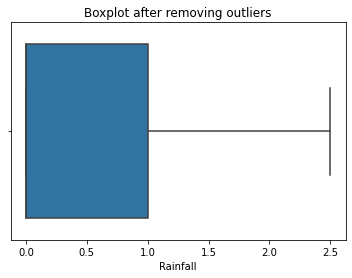

In [24]:
sns.boxplot(df['Rainfall'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Rainfall')
sns.boxplot(df['Rainfall'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

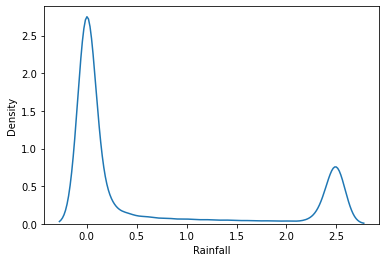

In [25]:
sns.distplot(df['Rainfall'],hist=False)

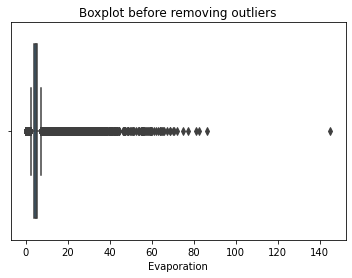

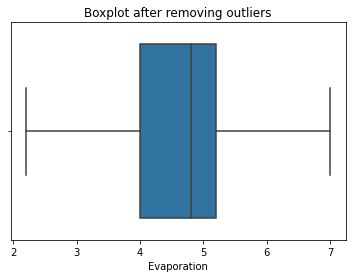

In [26]:
sns.boxplot(df['Evaporation'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Evaporation')
sns.boxplot(df['Evaporation'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

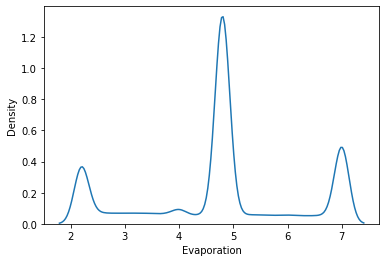

In [27]:
sns.distplot(df['Evaporation'],hist=False)

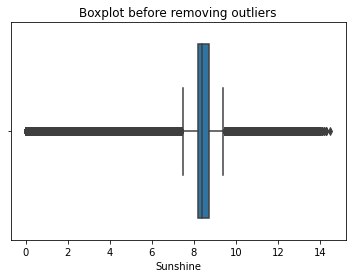

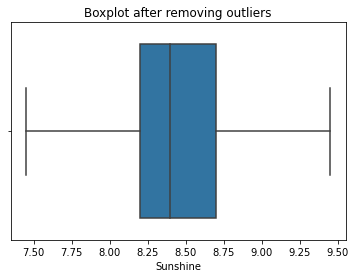

In [28]:
sns.boxplot(df['Sunshine'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Sunshine')
sns.boxplot(df['Sunshine'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

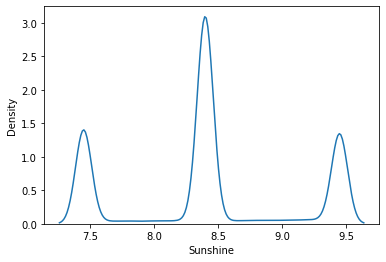

In [29]:
sns.distplot(df['Sunshine'],hist=False)

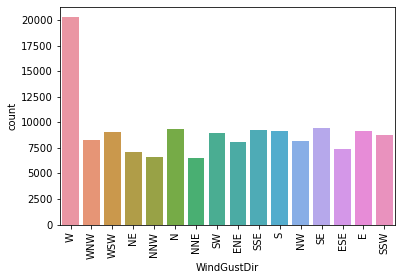

In [30]:
sns.countplot(df['WindGustDir'])
plt.xticks(rotation=90)
plt.show()

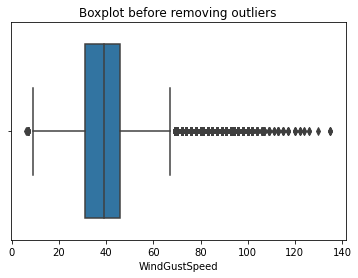

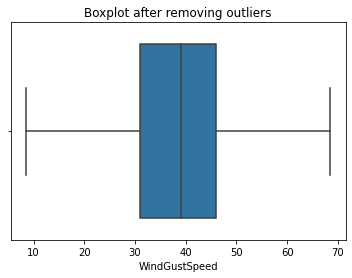

In [31]:
sns.boxplot(df['WindGustSpeed'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'WindGustSpeed')
sns.boxplot(df['WindGustSpeed'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

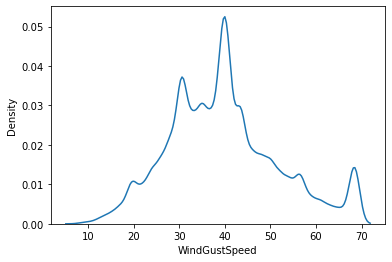

In [32]:
sns.distplot(df['WindGustSpeed'],hist=False)

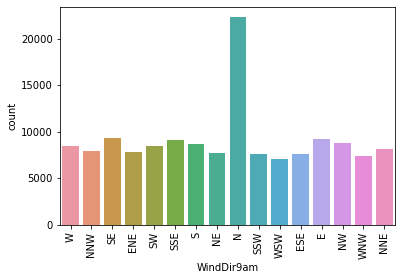

In [33]:
sns.countplot(df['WindDir9am'])
plt.xticks(rotation=90)
plt.show()

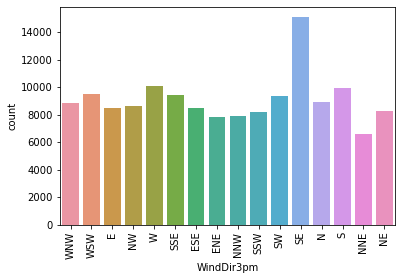

In [34]:
sns.countplot(df['WindDir3pm'])
plt.xticks(rotation=90)
plt.show()

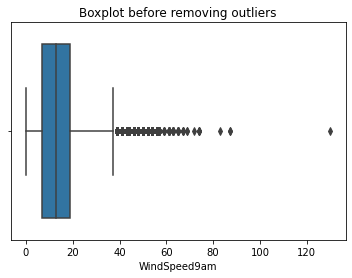

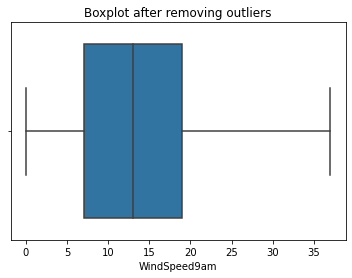

In [35]:
sns.boxplot(df['WindSpeed9am'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'WindSpeed9am')
sns.boxplot(df['WindSpeed9am'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

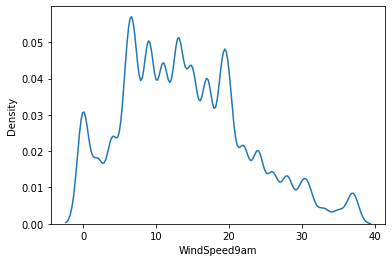

In [36]:
sns.distplot(df['WindSpeed9am'],hist=False)

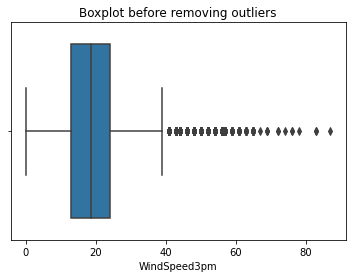

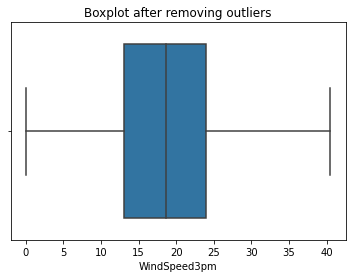

In [37]:
sns.boxplot(df['WindSpeed3pm'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'WindSpeed3pm')
sns.boxplot(df['WindSpeed3pm'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

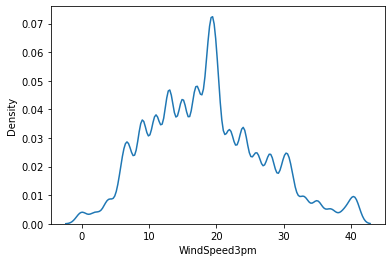

In [38]:
sns.distplot(df['WindSpeed3pm'],hist=False)

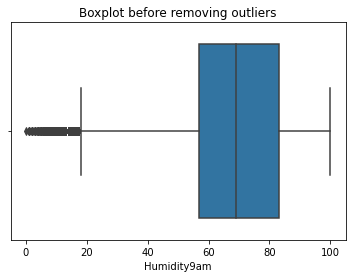

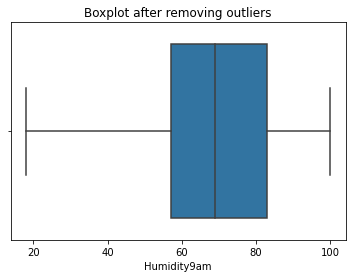

In [39]:
sns.boxplot(df['Humidity9am'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Humidity9am')
sns.boxplot(df['Humidity9am'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

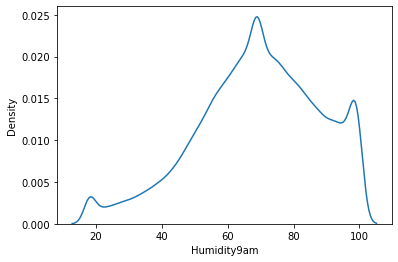

In [40]:
sns.distplot(df['Humidity9am'],hist=False)

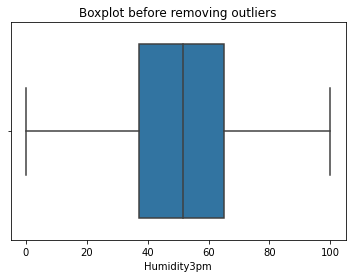

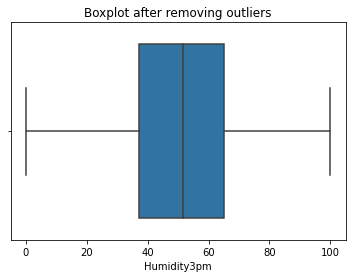

In [41]:
sns.boxplot(df['Humidity3pm'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Humidity3pm')
sns.boxplot(df['Humidity3pm'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

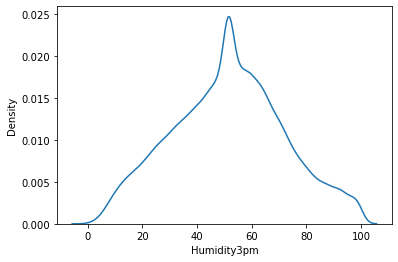

In [42]:
sns.distplot(df['Humidity3pm'],hist=False)

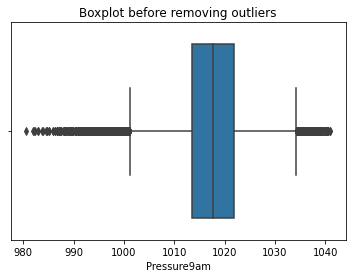

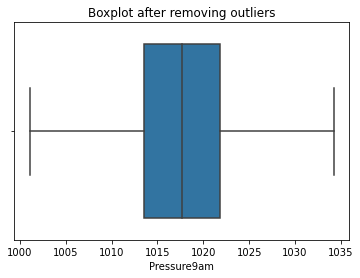

In [43]:
sns.boxplot(df['Pressure9am'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Pressure9am')
sns.boxplot(df['Pressure9am'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

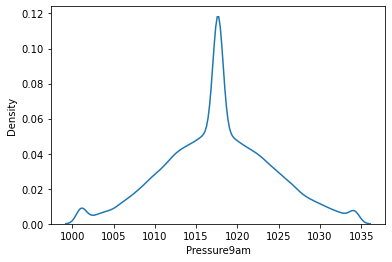

In [44]:
sns.distplot(df['Pressure9am'],hist=False)

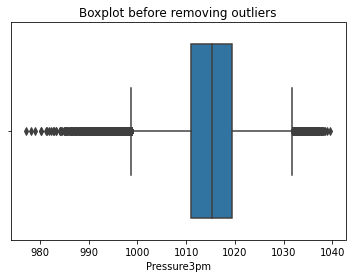

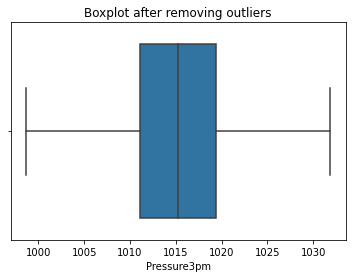

In [45]:
sns.boxplot(df['Pressure3pm'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Pressure3pm')
sns.boxplot(df['Pressure3pm'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

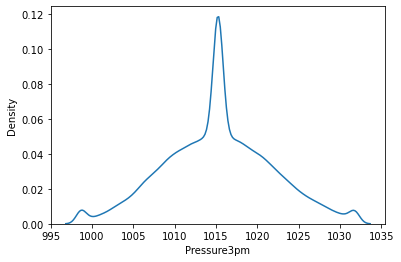

In [46]:
sns.distplot(df['Pressure3pm'],hist=False)

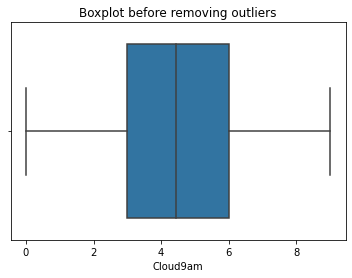

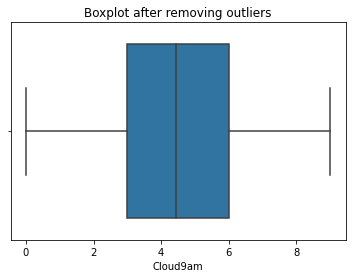

In [47]:
sns.boxplot(df['Cloud9am'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Cloud9am')
sns.boxplot(df['Cloud9am'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

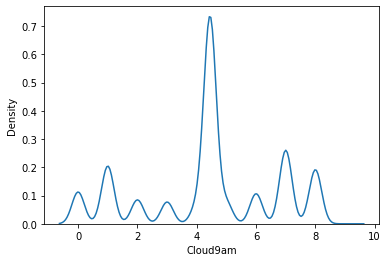

In [48]:
sns.distplot(df['Cloud9am'],hist=False)

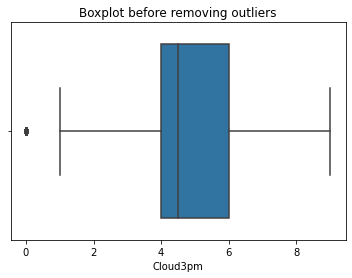

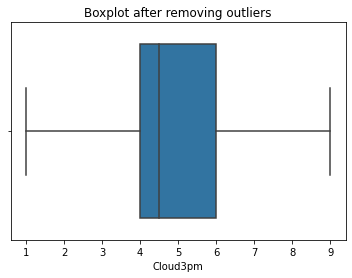

In [49]:
sns.boxplot(df['Cloud3pm'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Cloud3pm')
sns.boxplot(df['Cloud3pm'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

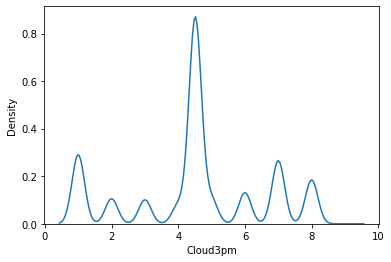

In [50]:
sns.distplot(df['Cloud3pm'],hist=False)

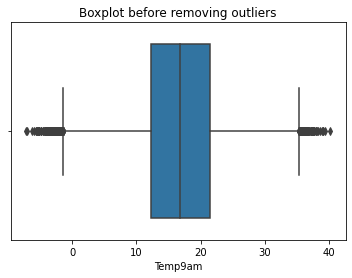

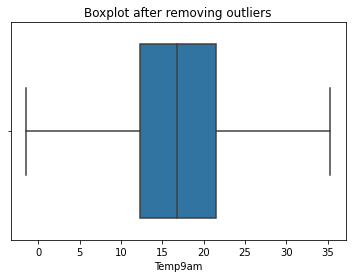

In [51]:
sns.boxplot(df['Temp9am'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Temp9am')
sns.boxplot(df['Temp9am'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

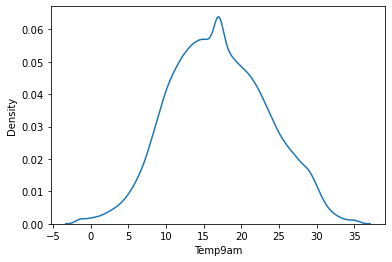

In [52]:
sns.distplot(df['Temp9am'],hist=False)

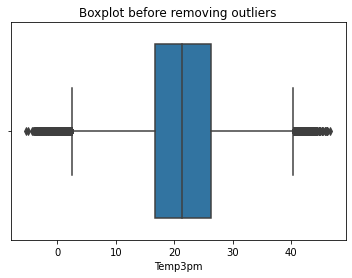

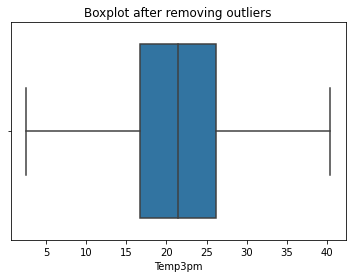

In [53]:
sns.boxplot(df['Temp3pm'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'Temp3pm')
sns.boxplot(df['Temp3pm'])
plt.title('Boxplot after removing outliers')
plt.show()

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

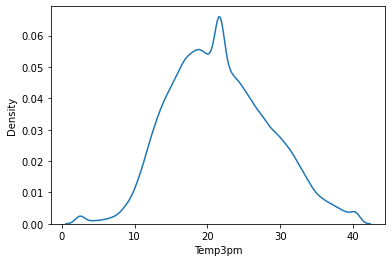

In [54]:
sns.distplot(df['Temp3pm'],hist=False)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

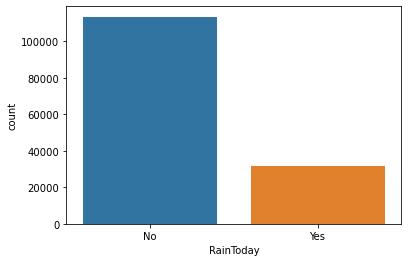

In [55]:
sns.countplot(df['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

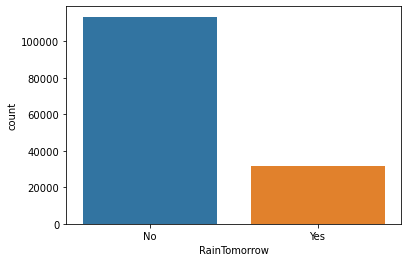

In [56]:
sns.countplot(df['RainTomorrow'])

# Observation from EDA:
**Univariate Analysis**
* The Weather dataset of Australia has aroud 150k rows and 23 columns.
* The basic information about the dataset is obtained through pandas function.
* By checking the nature of the dataset, there exist so many null values in all most every columns.
* So by imputation, We can remove those outliers by mean, median and mode.
* After treating the null values, we move on to Univariate analysis for detailed view of each column and also detection of the outliers.
* Most of the data spread around the year 2014,2015,2016 means we have a huge data lying in those features.
* The Weather prediction is mainly focussed on major cities in Australia such as Canberra, Sydney, Hobart etc..
* There are so many outliers present in the numerical columns of each data fields.
* We have to remove those outliers using IQR filtering.
* The minimum temperature at Australia is 13 deg/cel.
* The maximum temperature at Australia is 23 deg/cel.
* The average rainfall falls below 0 mm and maximum at 2.5 mm.
* The pan evaporation per millimeter lies at 5mm.
* The average brightness of sunshine lies in the range between 8.25 and 8.50.
* The direction of wind gust lies in the direction of West most of the times.
* The average wind gust speed lies at 40 kmph.
* At 9 am everyday, mostly the wind direction is at north side.
* At 3 pm everyday, mostly the wind direction is at south east side.
* At 9 am, wind speed is 15 kmph on an average.
* At 3 pm , wind speed is 20 kmph on an average.
* The air moisture at 9 am is around 70.
* The air moisture at 3 pm is around 50.
* The pressure observed at sea level tends to be 1020 at 9 am everyday.
* The pressure observed at sea level tends to be 1015 at 3 pm everyday.
* Cloud clearance in sky is around 4 points at morning.
* Cloud clearnace in sky is around 4.5 points at evening.
* Average morning Temperature be 17 deg/cel.
* Average evening Temperature be 22 deg/cel.
* Most of the day we don't have rain according to the feature.
* There exist a good correlation between Today and Tomorrow feature means the dependency of tomorrow's weather lies mostly on present weather condition.

# Bivariate analysis

Location
MountGinini     3.846203
Canberra        6.834987
Tuggeranong     7.245671
Ballarat        7.369538
Launceston      7.844791
Sale            8.568625
Bendigo         8.596082
Dartmoor        8.701990
MountGambier    8.827693
Nhil            9.009930
Name: MinTemp, dtype: float64


<AxesSubplot:xlabel='Location'>

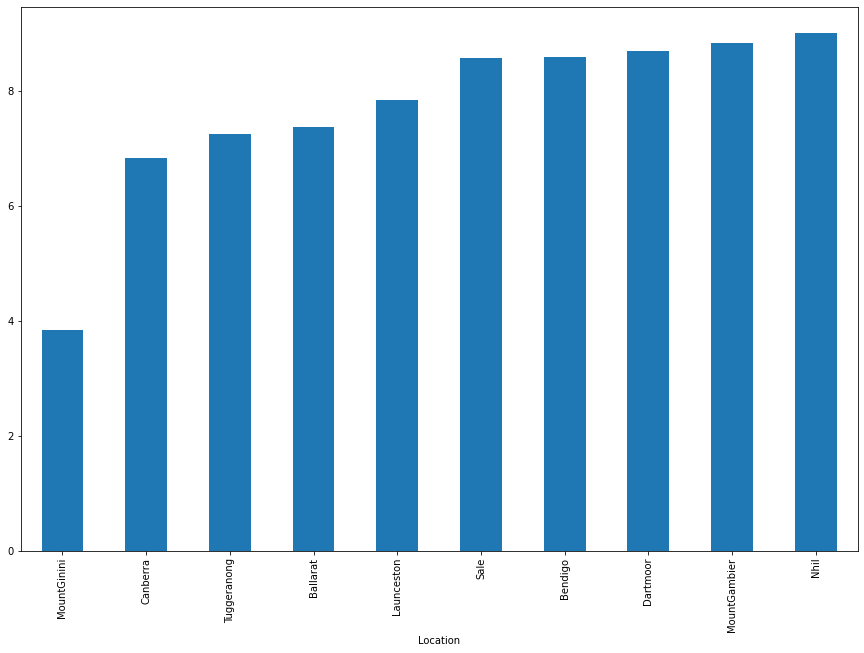

In [57]:
gp1 = df.groupby('Location')['MinTemp'].mean().sort_values(ascending=True)[:10]
print(gp1)
gp1.plot(kind="bar",figsize=(15,10))

Location
Katherine       34.638501
Darwin          32.538059
Uluru           30.349524
Cairns          29.558849
Townsville      29.365139
AliceSprings    29.242448
Moree           26.947524
Woomera         26.578586
Brisbane        26.434231
PearceRAAF      26.028796
Name: MaxTemp, dtype: float64


<AxesSubplot:xlabel='Location'>

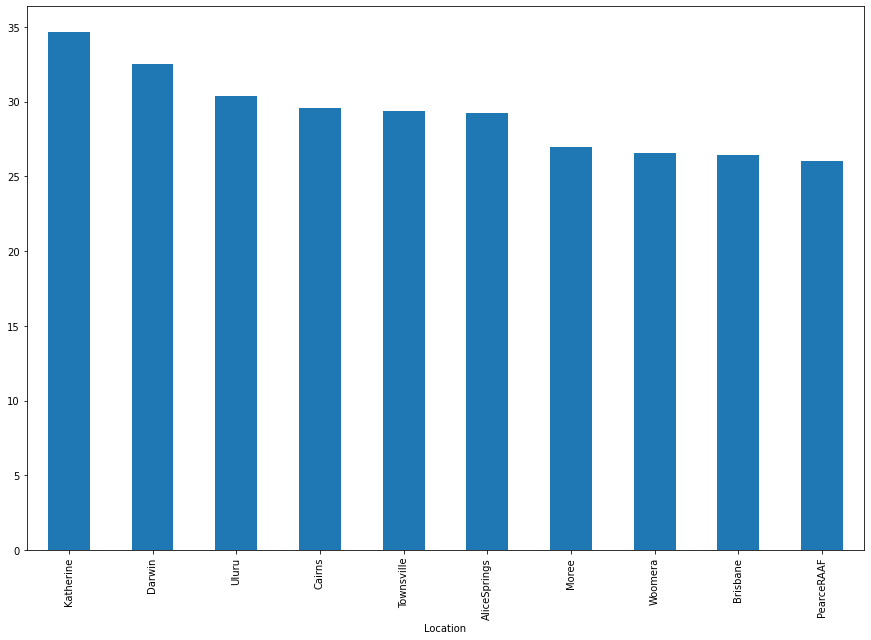

In [58]:
gp2 = df.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False)[:10]
print(gp2)
gp2.plot(kind="bar",figsize=(15,10))

Location
Melbourne        1.058151
Williamtown      0.947650
Walpole          0.940416
Portland         0.939213
Cairns           0.839595
Dartmoor         0.836219
NorfolkIsland    0.822413
MountGinini      0.797106
Witchcliffe      0.796402
MountGambier     0.782253
Name: Rainfall, dtype: float64


<AxesSubplot:ylabel='Rainfall'>

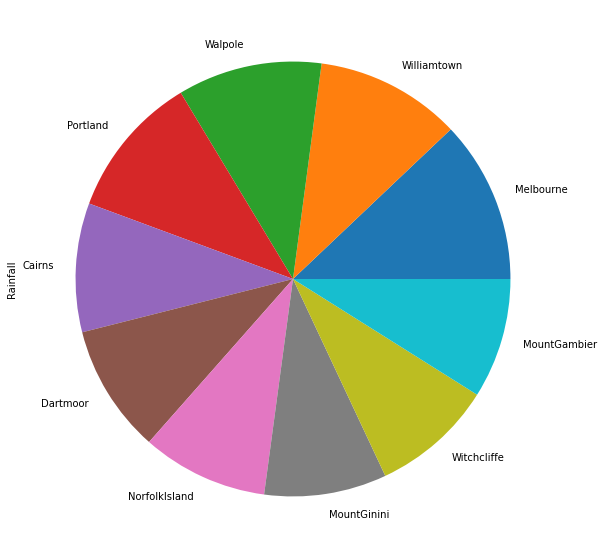

In [59]:
gp3 = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)[:10]
print(gp3)
gp3.plot(kind="pie",figsize=(15,10))

Location
Katherine       6.142776
Townsville      6.063947
Darwin          5.901034
AliceSprings    5.878816
Woomera         5.649252
Cairns          5.537730
Moree           5.219342
Brisbane        5.020827
Cobar           5.006049
Williamtown     4.895613
Name: Evaporation, dtype: float64


<AxesSubplot:ylabel='Evaporation'>

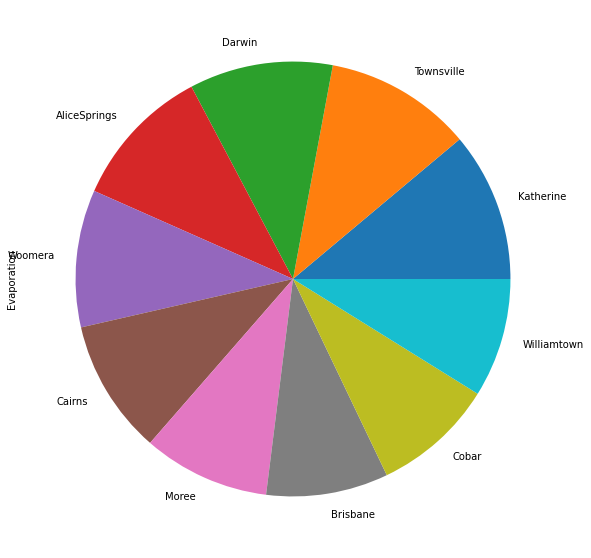

In [60]:
gp4 = df.groupby('Location')['Evaporation'].mean().sort_values(ascending=False)[:10]
print(gp4)
gp4.plot(kind="pie",figsize=(15,10))

                  WindSpeed9am  WindSpeed3pm
Location                                    
NorfolkIsland        20.072232     21.842913
Woomera              19.858150     20.417406
Ballarat             19.806035     22.540346
MelbourneAirport     19.490875     22.791625
GoldCoast            19.037742     25.427646
Melbourne            18.428464     21.840276
SydneyAirport        18.331715     25.396199
Moree                18.057754     16.857982
PerthAirport         17.699264     21.238672
Uluru                17.532676     17.048720


array([<AxesSubplot:ylabel='WindSpeed9am'>,
       <AxesSubplot:ylabel='WindSpeed3pm'>], dtype=object)

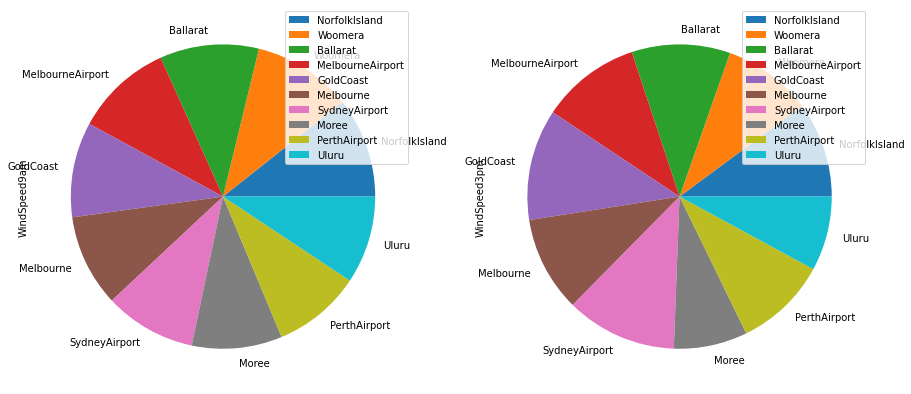

In [61]:
gp5 = df.groupby(['Location'])['WindSpeed9am','WindSpeed3pm'].mean().sort_values(by='WindSpeed9am',ascending=False)[:10]
print(gp5)
gp5.plot(kind="pie",subplots=True,figsize=(15,10))

               Humidity9am  Humidity3pm
Location                               
Dartmoor         83.980003    61.640180
Ballarat         81.733387    59.013741
Launceston       79.479041    57.303418
Sale             78.857340    56.329706
Portland         78.551067    65.929215
Watsonia         78.343414    54.708873
BadgerysCreek    76.751932    51.384730
Richmond         76.740435    49.050630
MountGinini      76.015803    67.862390
Walpole          75.967562    66.021074


array([<AxesSubplot:ylabel='Humidity9am'>,
       <AxesSubplot:ylabel='Humidity3pm'>], dtype=object)

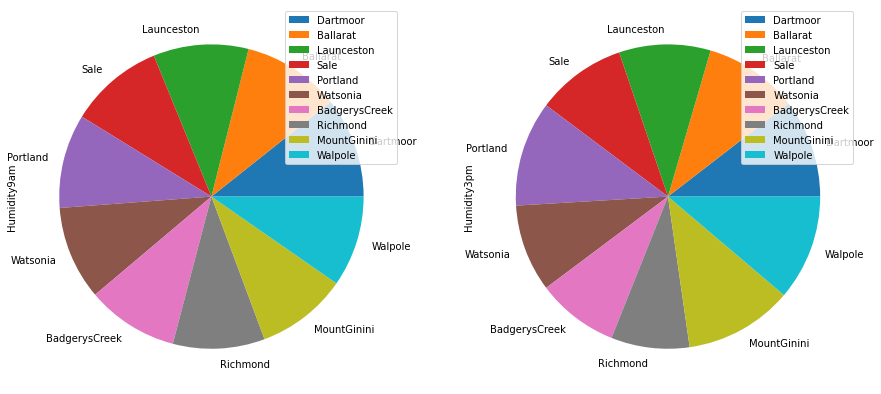

In [62]:
gp6 = df.groupby(['Location'])['Humidity9am','Humidity3pm'].mean().sort_values(by='Humidity9am',ascending=False)[:10]
print(gp6)
gp6.plot(kind="pie",subplots=True,figsize=(15,10))

             Pressure9am  Pressure3pm
Location                             
Nuriootpa    1018.906248  1016.777234
Canberra     1018.893273  1016.172337
Mildura      1018.767614  1016.257531
Adelaide     1018.759114  1016.793561
Richmond     1018.678464  1015.635778
Woomera      1018.625241  1015.967575
Nhil         1018.543092  1016.384778
WaggaWagga   1018.502908  1015.858923
Tuggeranong  1018.496331  1015.655253
Williamtown  1018.428830  1015.915575


<AxesSubplot:xlabel='Location'>

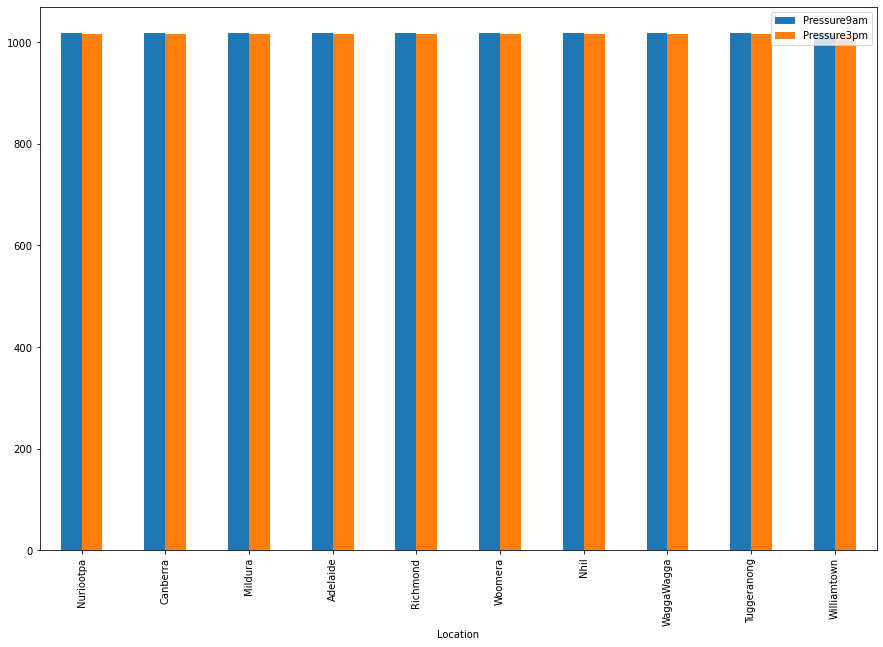

In [63]:
gp7 = df.groupby(['Location'])['Pressure9am','Pressure3pm'].mean().sort_values(by=['Pressure9am'],ascending=False)[:10]
print(gp7)
gp7.plot(kind="bar",figsize=(15,10))

                  Cloud9am  Cloud3pm
Location                            
Portland          6.079214  5.807462
Ballarat          5.555366  5.673818
MountGambier      5.481652  5.470096
Albury            5.271548  4.930762
MelbourneAirport  5.246261  5.280994
Watsonia          5.246261  5.280994
Sale              5.239013  5.036854
Wollongong        5.232713  5.137045
Albany            5.182238  4.784066
Melbourne         5.033409  5.064824


<AxesSubplot:xlabel='Location'>

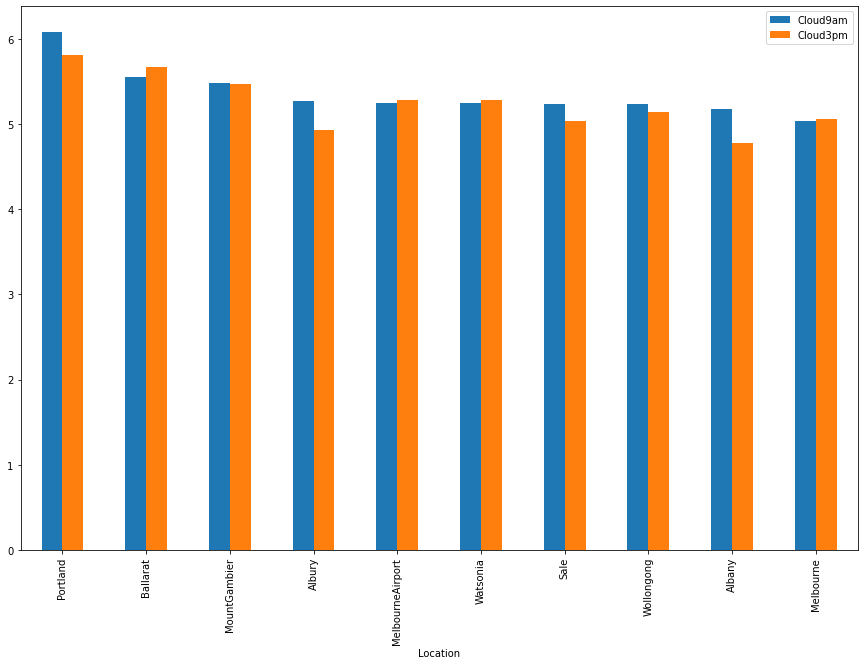

In [64]:
gp8 = df.groupby(['Location'])['Cloud9am','Cloud3pm'].mean().sort_values(by=['Cloud9am','Cloud3pm'],ascending=False)[:10]
print(gp8)
gp8.plot(kind="bar",figsize=(15,10))

                 Temp9am    Temp3pm
Location                           
Darwin         27.185625  31.076845
Katherine      26.391576  28.101758
Cairns         25.817201  27.909112
Townsville     25.634967  27.769934
GoldCoast      22.374076  23.770916
Brisbane       21.835096  24.739039
AliceSprings   21.325987  27.994742
Uluru          20.972154  29.019952
CoffsHarbour   20.155088  22.340800
NorfolkIsland  19.779180  20.470876


<AxesSubplot:xlabel='Location'>

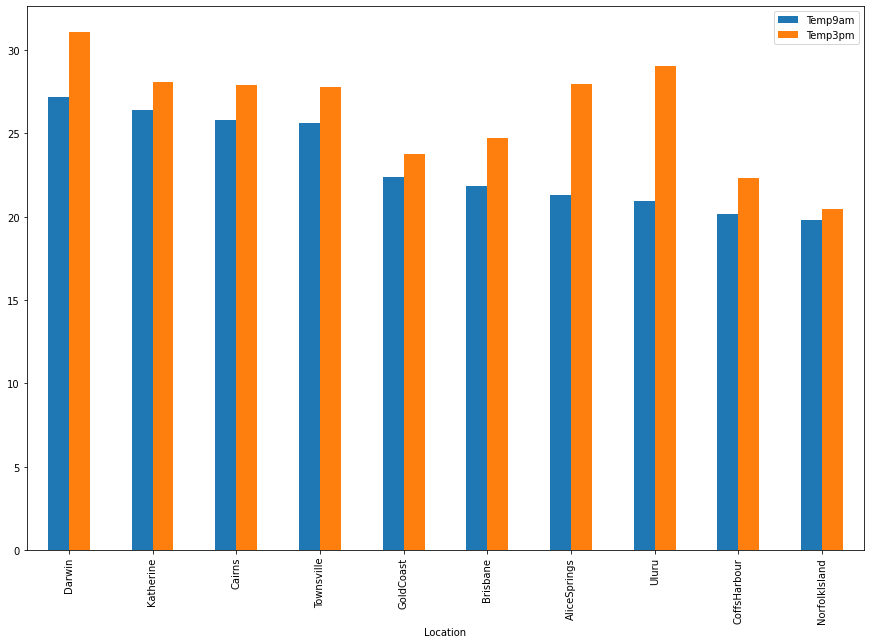

In [65]:
gp9 = df.groupby(['Location'])['Temp9am','Temp3pm'].mean().sort_values(by=['Temp9am','Temp3pm'],ascending=False)[:10]
print(gp9)
gp9.plot(kind="bar",figsize=(15,10))

Location      RainToday
Woomera       No           2807
Canberra      No           2807
AliceSprings  No           2796
Mildura       No           2682
Cobar         No           2623
                           ... 
Katherine     Yes           265
AliceSprings  Yes           244
Nhil          Yes           242
Woomera       Yes           202
Uluru         Yes           116
Name: RainToday, Length: 98, dtype: int64


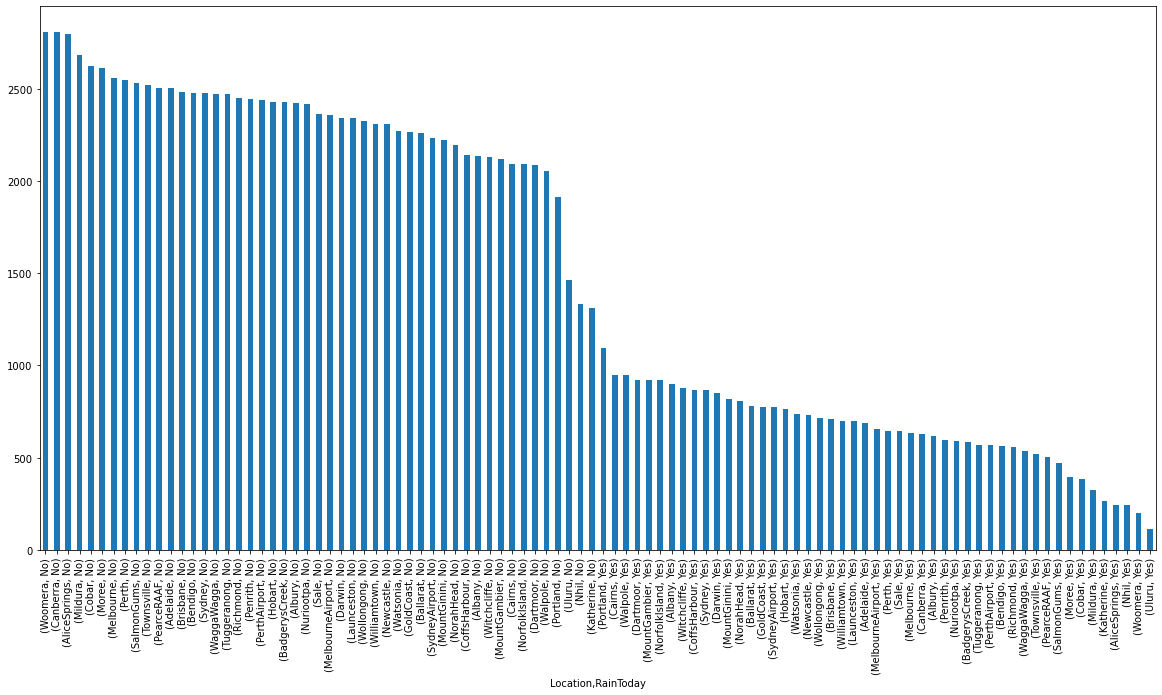

In [66]:
gp10 = df.groupby('Location')['RainToday'].value_counts().sort_values(ascending=False)
gp10.plot(kind="bar",figsize=(20,10))
print(gp10)

Location      RainTomorrow
Woomera       No              2807
Canberra      No              2807
AliceSprings  No              2796
Mildura       No              2682
Cobar         No              2623
                              ... 
Katherine     Yes              265
AliceSprings  Yes              244
Nhil          Yes              242
Woomera       Yes              202
Uluru         Yes              116
Name: RainTomorrow, Length: 98, dtype: int64


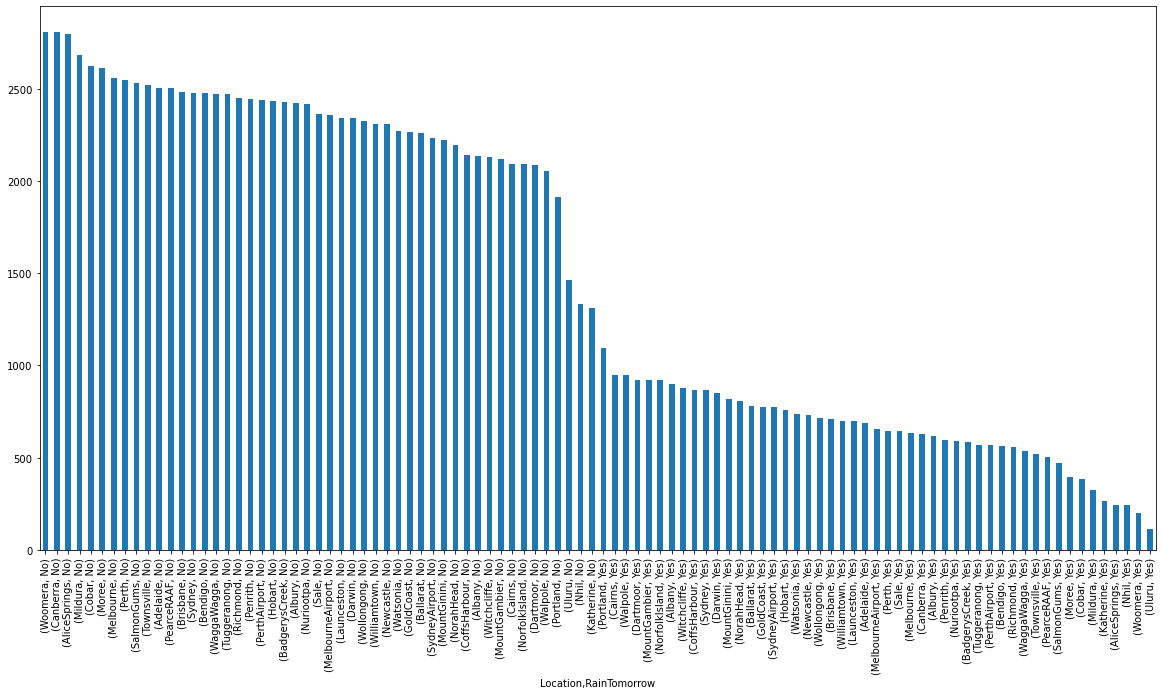

In [67]:
gp11 = df.groupby('Location')['RainTomorrow'].value_counts().sort_values(ascending=False)
gp11.plot(kind="bar",figsize=(20,10))
print(gp11)

           WindSpeed9am  WindSpeed3pm
RainToday                            
No            13.507114     18.236958
Yes           15.538983     19.784031


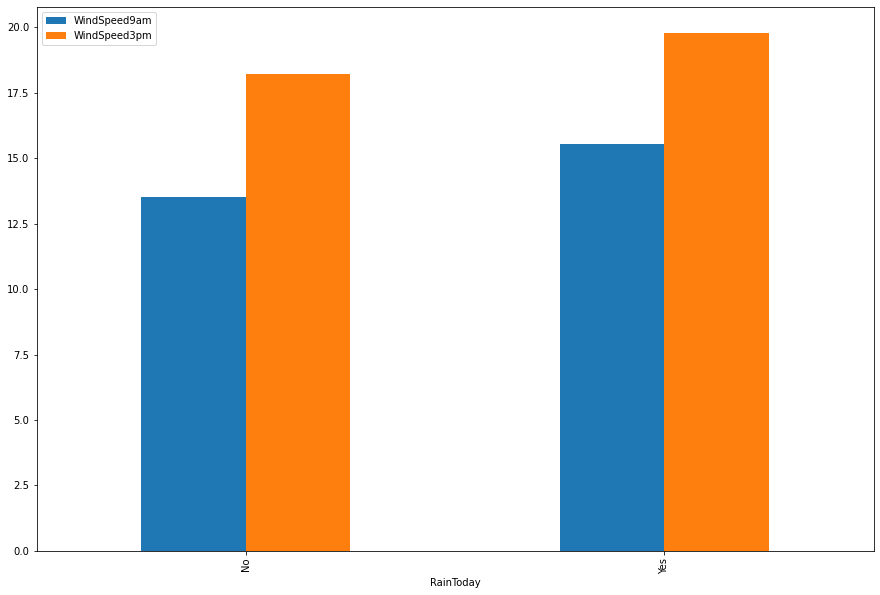

In [68]:
gp12 = df.groupby('RainToday')['WindSpeed9am','WindSpeed3pm'].mean()
gp12.plot(kind="bar",figsize=(15,10))
print(gp12)

             Temp9am    Temp3pm
RainToday                      
No         17.318261  22.514568
Yes        15.828420  18.732521


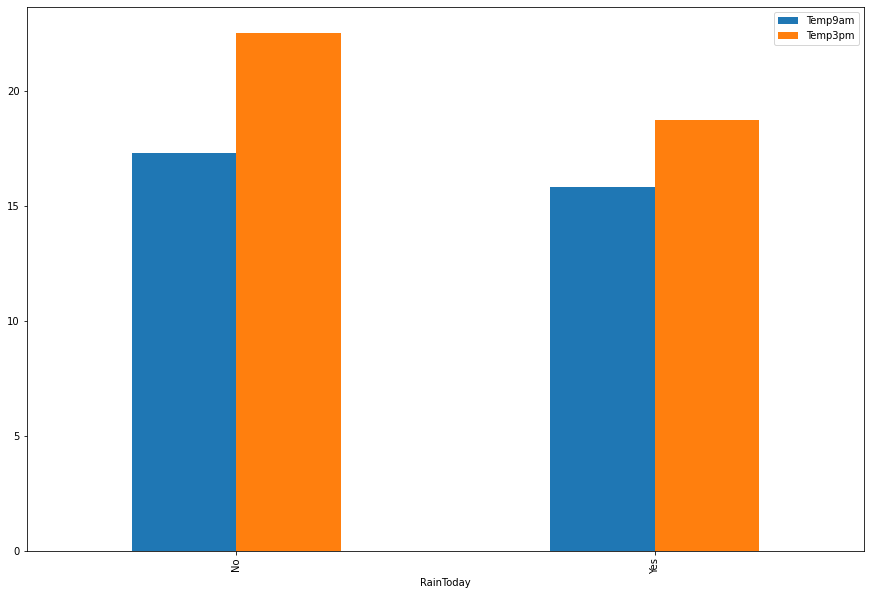

In [69]:
gp12 = df.groupby('RainToday')['Temp9am','Temp3pm'].mean()
gp12.plot(kind="bar",figsize=(15,10))
print(gp12)

           Pressure9am  Pressure3pm
RainToday                          
No          1018.28415  1015.609195
Yes         1015.51333  1014.081209


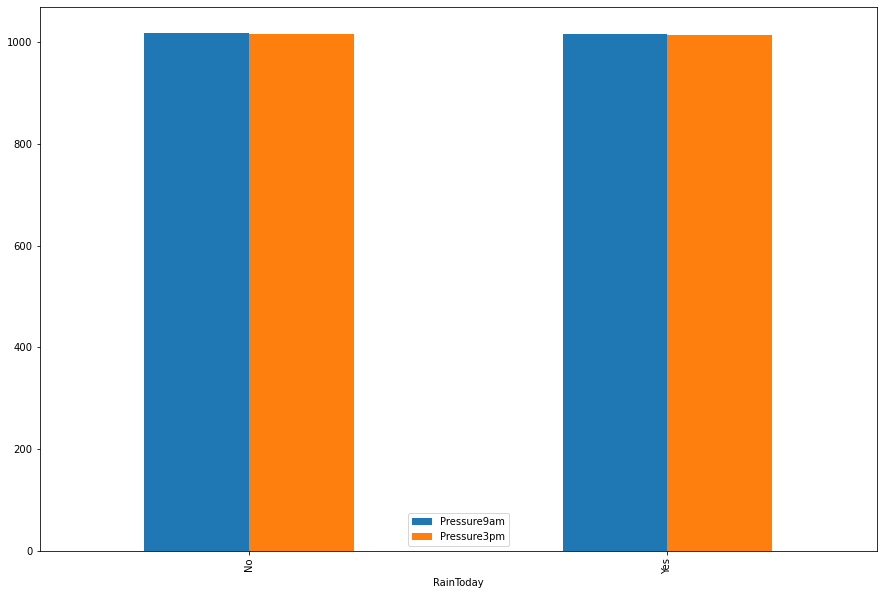

In [70]:
gp13 = df.groupby('RainToday')['Pressure9am','Pressure3pm'].mean()
gp13.plot(kind="bar",figsize=(15,10))
print(gp13)

           Humidity9am  Humidity3pm
RainToday                          
No           65.480044    47.548655
Yes          81.233165    65.756071


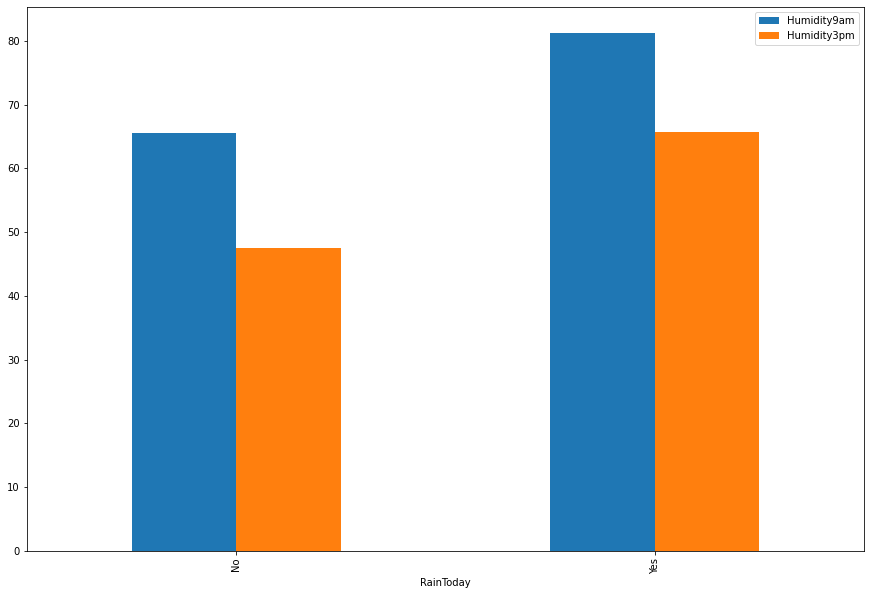

In [71]:
gp14 = df.groupby('RainToday')['Humidity9am','Humidity3pm'].mean()
gp14.plot(kind="bar",figsize=(15,10))
print(gp14)

In [72]:
gp15 = df.groupby('RainToday')['WindDir9am'].value_counts()
gp15

RainToday  WindDir9am
No         N             18484
           E              8096
           SE             7633
           SSE            7120
           NNE            7031
           ENE            6905
           NE             6601
           ESE            6579
           NW             6543
           S              6291
           NNW            5980
           W              5684
           SW             5562
           WNW            5298
           SSW            5238
           WSW            4535
Yes        N              3840
           SW             2861
           W              2775
           WSW            2489
           S              2368
           SSW            2349
           NW             2206
           WNW            2116
           NNW            2000
           SSE            1992
           SE             1654
           NNE            1098
           E              1080
           NE             1070
           ESE            1051
           ENE   

In [73]:
gp15 = df.groupby('RainToday')['WindDir3pm'].value_counts()
gp15

RainToday  WindDir3pm
No         SE            11744
           N              7564
           S              7303
           W              7199
           SSE            7191
           NE             7168
           E              7046
           ESE            7023
           WSW            6768
           SW             6738
           NW             6718
           ENE            6693
           WNW            6511
           NNW            6497
           NNE            5715
           SSW            5702
Yes        SE             3322
           W              2911
           WSW            2750
           S              2623
           SW             2616
           SSW            2454
           WNW            2363
           SSE            2208
           NW             1892
           ESE            1482
           E              1426
           NNW            1373
           N              1326
           ENE            1164
           NE             1095
           NNE   

# Observations from EDA:
**Bivariate analysis:**

* The bivariate analysis gives a clear view on how each variable rely on others.
* The minimum temperature is 3 deg/celcius at MountGinini.
* The maximum temperature is 34 deg/celcius at Katherine.
* Melbourne has the highest average rainfall.
* Evaporation rate is high at Katherine due to high temperature.
* Wind speed is higher at dense forest areas compared to urban areas.
* Humidity is very high at Dartmoor, which has the higher probability of rain.
* Nuriootpa and Canberra seems to be the high pressure region compared to other cities from sea level.
* Cloud clerance is very low in Portland compared to other cities.
* Morning temperature and Evening temperature seems to be very high in Darwin and Katherine.
* From this we can conclude that there is a very less probability for rain at Darwin and Katherine.
* Whereas high probability chance for Portland, MountGinini etc..
* Rainfall Today and Rainfall Tomorrow has the highest correlation.
* When it is raining the wind speed is very high.
* On no rain day, evenings has high amount of temperature.
* Pressure is very low when there is rain.
* Humidity at morning seems very high compared to evenings on rainy days.
* Most probably at morning we have the wind direction at North side.
* At evening we have the wind direction at South East side, which is straight opposite.
* From the bivariate analysis, it is clear that rain mostly depends on temperature and humidity of that particular region.

# Feature Engineering:

In [74]:
from sklearn.preprocessing import  LabelEncoder
le= LabelEncoder()

In [75]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year'],
      dtype='object')

In [76]:
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [77]:
df1 = pd.read_csv("weatherAUS.csv",usecols=['Location','WindGustDir','WindDir9am','WindDir3pm'])
df1.head()

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


In [78]:
top_10loc = [x for x in df1['Location'].value_counts().sort_values(ascending=False).head(10).index]
top_10loc

['Canberra',
 'Sydney',
 'Melbourne',
 'Perth',
 'Darwin',
 'Brisbane',
 'Hobart',
 'Adelaide',
 'Launceston',
 'MountGinini']

In [79]:
top_5windgust = [x for x in df1.WindGustDir.value_counts().sort_values(ascending=False).head(5).index]
top_5windgust

['W', 'SE', 'N', 'SSE', 'E']

In [80]:
top_5wind9am = [x for x in df1.WindDir9am.value_counts().sort_values(ascending=False).head(5).index]
top_5wind9am

['N', 'SE', 'E', 'SSE', 'NW']

In [81]:
top_5wind3pm = [x for x in df1.WindDir3pm.value_counts().sort_values(ascending=False).head(5).index]
top_5wind3pm

['SE', 'W', 'S', 'WSW', 'SSE']

In [82]:
for label in top_10loc:
    df1['Location'+'_'+label] = np.where(df1['Location']==label,1,0)

In [83]:
for label in top_5windgust:
    df1['WindGustDir'+'_'+label] = np.where(df1['WindGustDir']==label,1,0)

In [84]:
for label in top_5wind9am:
    df1['WindDir9am'+'_'+label] = np.where(df1['WindDir9am']==label,1,0)

In [85]:
for label in top_5wind3pm:
    df1['WindDir3pm'+'_'+label] = np.where(df1['WindDir3pm']==label,1,0)

In [86]:
df = pd.concat([df,df1],axis=1)

In [87]:
col1 = df.loc[:,"Temp9am":"Temp3pm"]
df['Avg_temp'] = col1.mean(axis=1)

In [88]:
col2 = df.loc[:,"WindSpeed9am":"WindSpeed3pm"]
df['Avg_Wind_speed'] = col2.mean(axis=1)

In [89]:
col3 = df.loc[:,"Humidity9am":"Humidity3pm"]
df['Avg_Humidity'] = col3.mean(axis=1)

In [90]:
col4 = df.loc[:,"Pressure9am":"Pressure3pm"]
df['Avg_Pressure'] = col4.mean(axis=1)

In [91]:
col5 = df.loc[:,"Cloud9am":"Cloud3pm"]
df['Avg_Cloud_visible'] = col5.mean(axis=1)

In [92]:
#dropping the unwanted columns
df = df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Year',
             'MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
             'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
             'Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)

<AxesSubplot:>

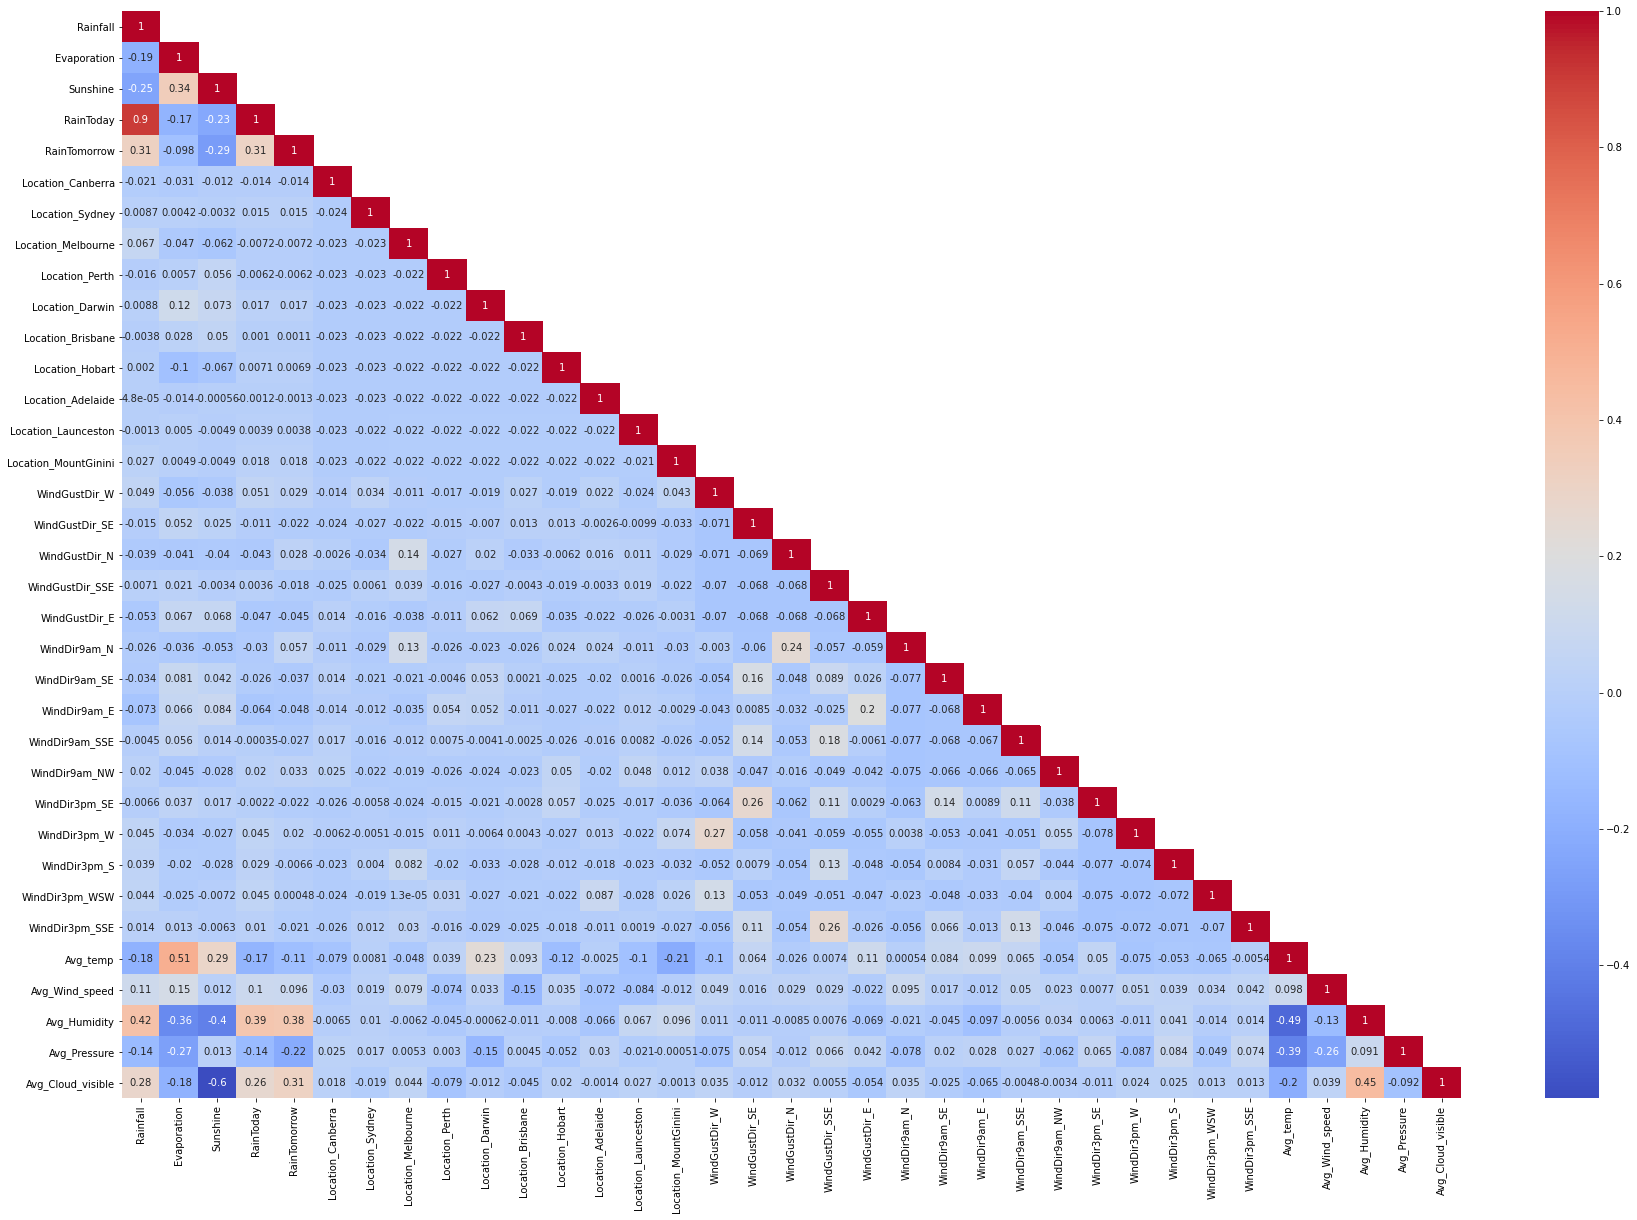

In [93]:
plt.figure(figsize=(30,20))
df_lt = df.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

In [95]:
df = df[['Avg_temp','Rainfall','Evaporation','Sunshine',
        'Avg_Wind_speed','Avg_Humidity','Avg_Pressure','Avg_Cloud_visible',
        'RainToday','RainTomorrow','Location_Canberra', 'Location_Sydney',
       'Location_Adelaide', 'Location_Perth', 'Location_Hobart',
       'Location_Melbourne', 'Location_Brisbane', 'Location_Darwin',
       'Location_Launceston', 'Location_MountGinini', 'WindGustDir_W',
       'WindGustDir_SE', 'WindGustDir_N', 'WindGustDir_SSE', 'WindGustDir_E',
       'WindDir9am_N', 'WindDir9am_SE', 'WindDir9am_E', 'WindDir9am_SSE',
       'WindDir9am_NW', 'WindDir3pm_SE', 'WindDir3pm_W', 'WindDir3pm_S',
       'WindDir3pm_WSW', 'WindDir3pm_SSE']]

In [96]:
df.head(20)

,Avg_temp,Rainfall,Evaporation,Sunshine,Avg_Wind_speed,Avg_Humidity,Avg_Pressure,Avg_Cloud_visible,RainToday,RainTomorrow,...,WindDir9am_N,WindDir9am_SE,WindDir9am_E,WindDir9am_SSE,WindDir9am_NW,WindDir3pm_SE,WindDir3pm_W,WindDir3pm_S,WindDir3pm_WSW,WindDir3pm_SSE
0,19.35,0.600000,4.8,8.4,22.000000,46.5,1007.40,6.254965,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.75,0.000000,4.8,8.4,13.000000,34.5,1009.20,4.478696,0,0,...,0,0,0,0,0,0,0,0,1,0
2,22.10,0.000000,4.8,8.4,22.500000,34.0,1008.15,3.223731,0,0,...,0,0,0,0,0,0,0,0,1,0
3,22.30,0.000000,4.8,8.4,10.000000,30.5,1015.20,4.478696,0,0,...,0,1,0,0,0,0,0,0,0,0
4,23.75,1.000000,4.8,8.4,13.500000,57.5,1008.40,7.500000,0,0,...,0,0,0,0,0,0,0,0,0,0
5,24.75,0.200000,4.8,8.4,21.500000,39.0,1007.30,4.478696,0,0,...,0,0,0,0,0,0,1,0,0,0
6,21.35,0.000000,4.8,8.4,22.000000,34.0,1008.90,2.754965,0,0,...,0,0,0,0,0,0,1,0,0,0
7,20.90,0.000000,4.8,8.4,11.500000,33.5,1011.75,4.478696,0,0,...,0,0,0,1,0,0,1,0,0,0
8,24.25,0.000000,4.8,8.4,17.500000,25.5,1006.25,4.478696,0,1,...,0,1,0,0,0,0,0,0,0,0
9,24.15,1.400000,4.8,8.4,13.000000,42.5,1006.35,4.478696,1,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df.tail(20)

,Avg_temp,Rainfall,Evaporation,Sunshine,Avg_Wind_speed,Avg_Humidity,Avg_Pressure,Avg_Cloud_visible,RainToday,RainTomorrow,...,WindDir9am_N,WindDir9am_SE,WindDir9am_E,WindDir9am_SSE,WindDir9am_NW,WindDir3pm_SE,WindDir3pm_W,WindDir3pm_S,WindDir3pm_WSW,WindDir3pm_SSE
145440,13.90,0.0,4.8,8.4,20.5,17.5,1027.85,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145441,15.00,0.0,4.8,8.4,16.5,23.0,1027.00,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145442,14.05,0.0,4.8,8.4,19.5,42.0,1028.45,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145443,13.80,0.0,4.8,8.4,21.5,38.5,1029.75,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145444,12.80,0.0,4.8,8.4,17.5,42.5,1029.10,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145445,13.40,0.0,4.8,8.4,17.0,41.5,1028.10,4.478696,0,0,...,0,1,0,0,0,0,0,0,0,0
145446,13.85,0.0,4.8,8.4,15.0,42.5,1027.15,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145447,15.30,0.0,4.8,8.4,18.0,44.5,1025.10,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0
145448,14.60,0.0,4.8,8.4,9.0,44.0,1024.85,4.478696,0,0,...,0,1,0,0,0,0,0,0,0,1
145449,15.45,0.0,4.8,8.4,8.0,41.5,1023.20,4.478696,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df.isnull().sum()

Avg_temp                0
Rainfall                0
Evaporation             0
Sunshine                0
Avg_Wind_speed          0
Avg_Humidity            0
Avg_Pressure            0
Avg_Cloud_visible       0
RainToday               0
RainTomorrow            0
Location_Canberra       0
Location_Sydney         0
Location_Adelaide       0
Location_Perth          0
Location_Hobart         0
Location_Melbourne      0
Location_Brisbane       0
Location_Darwin         0
Location_Launceston     0
Location_MountGinini    0
WindGustDir_W           0
WindGustDir_SE          0
WindGustDir_N           0
WindGustDir_SSE         0
WindGustDir_E           0
WindDir9am_N            0
WindDir9am_SE           0
WindDir9am_E            0
WindDir9am_SSE          0
WindDir9am_NW           0
WindDir3pm_SE           0
WindDir3pm_W            0
WindDir3pm_S            0
WindDir3pm_WSW          0
WindDir3pm_SSE          0
dtype: int64

In [99]:
df.shape

(145460, 35)

# Feature Engineering:
* All the categorical features are encoded using Label encoder.
* Next by taking Wind direction and location column we have so many features so we have to do manual one hot encoding.
* By taking top 10 and 5 features in every column we can create a seperate data frame.
* The created dataframe are merged with the original dataset and unwanted colummns are removed.
* The correlation gives a detailed information of the variable relationship and the dataset is ready for model building.
* There are no null values in the dataset.

# Data preparation

In [100]:
target = df['RainTomorrow']
data = df.drop('RainTomorrow',axis=1)

In [101]:
#data standardization
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)

# Splitting Model

In [102]:
#for standardized data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(std_data,target,test_size=0.25,random_state=101)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109095, 34)
(36365, 34)
(109095,)
(36365,)


# Model building
**Using standardized data**

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [105]:
x_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [106]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
print("Training accuracy on standardized data:",accuracy_score(y_train,x_pred))
print("Testing accuracy on standardized data:",accuracy_score(y_test,y_pred))

Training accuracy on standardized data: 0.8310005041477612
Testing accuracy on standardized data: 0.8308263440120995


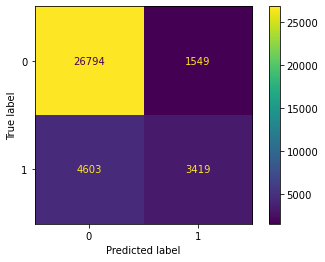

In [107]:
plot_confusion_matrix(lr,X_test,y_test,values_format='d')

In [108]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     28343
           1       0.69      0.43      0.53      8022

    accuracy                           0.83     36365
   macro avg       0.77      0.69      0.71     36365
weighted avg       0.82      0.83      0.82     36365



**Using non-standardized data**

In [109]:
#for non-standardized data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(data,target,test_size=0.25,random_state=101)

In [110]:
lr.fit(X_train1,y_train1)

LogisticRegression()

In [111]:
x_pred1 = lr.predict(X_train1)
y_pred1 = lr.predict(X_test1)

In [112]:
print("Training accuracy non-standardized data:",accuracy_score(y_train1,x_pred1))
print("Testing accuracy non-standardized data:",accuracy_score(y_test1,y_pred1))

Training accuracy non-standardized data: 0.8236582794811861
Testing accuracy non-standardized data: 0.8224116595627664


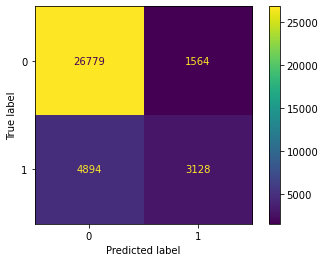

In [113]:
plot_confusion_matrix(lr,X_test1,y_test1,values_format='d')

In [114]:
cr1 = classification_report(y_test1,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     28343
           1       0.67      0.39      0.49      8022

    accuracy                           0.82     36365
   macro avg       0.76      0.67      0.69     36365
weighted avg       0.81      0.82      0.80     36365



# Roc-curve

In [115]:
from sklearn.metrics import roc_curve
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = lr.predict_proba(X_test1)
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test1,pred_prob2[:,1],pos_label=1)

In [116]:
random_prob = [0 for i in range(len(y_test))]
p_fpr , p_tpr , _ = roc_curve(y_test,random_prob, pos_label=1)

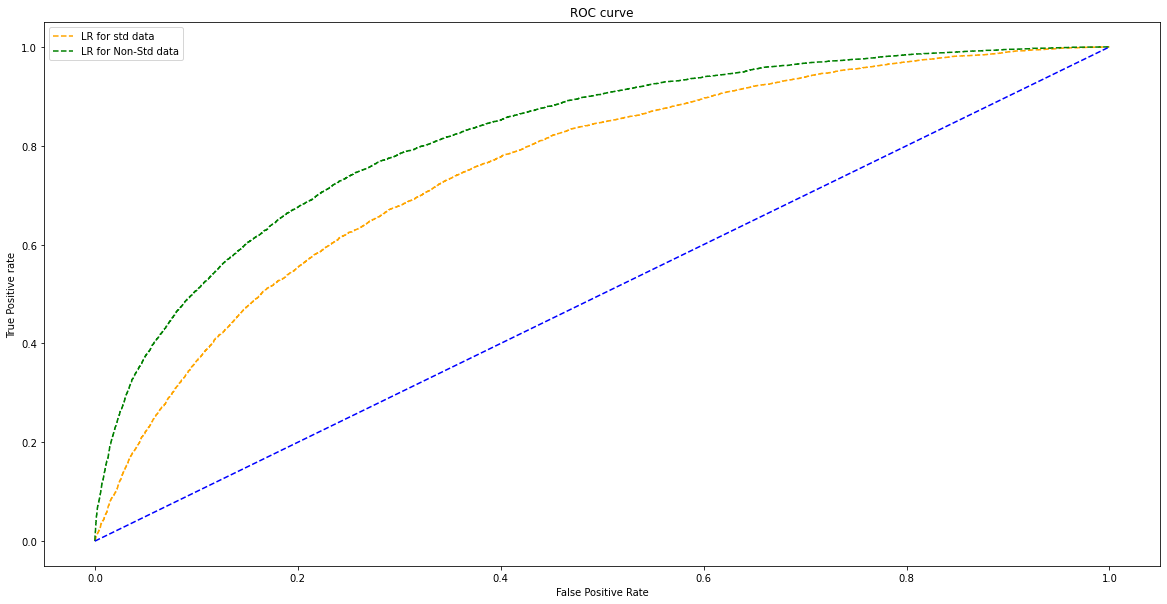

In [117]:
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LR for std data')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LR for Non-Std data')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Conclusion:
* For this dataset we use logistic regression algorithm as it is a classification problem.
* We are building a model for both standardized and non-standardized data.
* Standardized data gives an accuracy of 83% whereas non-standardized gives an accuracy of 82% which is in both the cases model is performing well.
* The ROC plot gives an clear cut conclusion that non-standardized data performs very well and well suited for model building approach.